In [1]:
import urllib2
import numpy as np
import json
import pandas as pd
pd.set_option("display.max_columns",999)
from pandas.io.json import json_normalize
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import plotly as py
import plotly.graph_objs as go
py.tools.set_credentials_file(username='tjogesh', api_key='jQCndI6d5M1oYF4mXX7i')

In [3]:
import findspark
findspark.init()
import pyspark
#pyspark.SparkContext.setSystemProperty('spark.executor.memory', '2g')
sc = pyspark.SparkContext()

In [4]:
from pyspark.sql import SQLContext
sqlsc=SQLContext(sc)

In [8]:
#sparkdf = sqlsc.createDataFrame(iNat_df_main)
df=pd.read_csv("insects_only.csv")
#data = sqlsc.read.load("insects_only.csv")

/Users/taniajogesh/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.



In [9]:
data= sqlsc.createDataFrame(df)

In [10]:
data.printSchema()

root
 |-- id: long (nullable = true)
 |-- observed_on_string: string (nullable = true)
 |-- observed_on: string (nullable = true)
 |-- time_observed_at: double (nullable = true)
 |-- time_zone: string (nullable = true)
 |-- out_of_range: double (nullable = true)
 |-- user_id: long (nullable = true)
 |-- user_login: string (nullable = true)
 |-- created_at: string (nullable = true)
 |-- updated_at: string (nullable = true)
 |-- quality_grade: string (nullable = true)
 |-- license: string (nullable = true)
 |-- url: string (nullable = true)
 |-- image_url: string (nullable = true)
 |-- tag_list: double (nullable = true)
 |-- description: double (nullable = true)
 |-- id_please: boolean (nullable = true)
 |-- num_identification_agreements: long (nullable = true)
 |-- num_identification_disagreements: long (nullable = true)
 |-- captive_cultivated: boolean (nullable = true)
 |-- oauth_application_id: double (nullable = true)
 |-- place_guess: string (nullable = true)
 |-- latitude: double 

In [11]:
data.count()

150360

In [12]:
species= data.groupby('species_guess').count().toPandas() 

In [13]:
species.head()

,species_guess,count
0,Chapulines,107
1,Ammophila,110
2,Clytrini,18
3,blattodea,1
4,Brochymena (Rough Stink Bugs),1


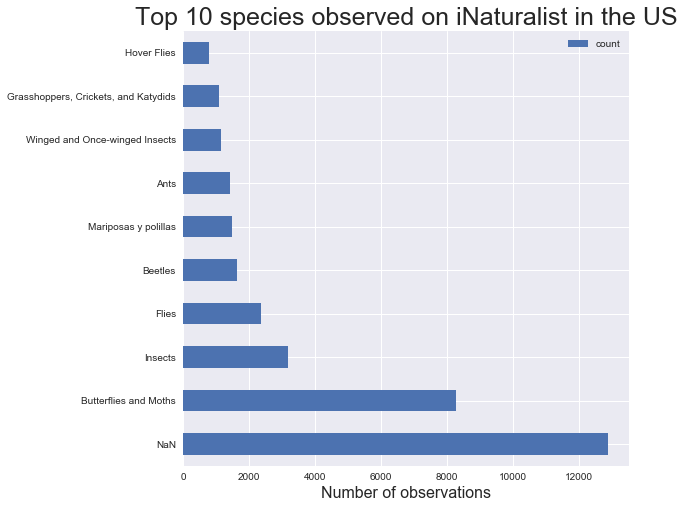

In [14]:
species.set_index('species_guess').sort_values('count', ascending=False).head(10).plot(kind='barh', figsize=(8, 8))
plt.title('Top 10 species observed on iNaturalist in the US', fontsize = 25)
plt.xlabel('Number of observations', fontsize = 16)
plt.ylabel("")
plt.show()

In [16]:
data.groupby('quality_grade').count().show()

+-------------+------+
|quality_grade| count|
+-------------+------+
|     needs_id|150360|
+-------------+------+



In [18]:
data.groupby('num_identification_agreements').count().show()

+-----------------------------+-----+
|num_identification_agreements|count|
+-----------------------------+-----+
|                            0|79078|
|                           -1|    1|
|                            1|37367|
|                            2|25311|
|                            3| 7162|
|                            4| 1032|
|                            5|  286|
|                            6|   89|
|                            7|   17|
|                            8|   11|
|                            9|    3|
|                           10|    1|
|                           12|    2|
+-----------------------------+-----+

